In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

/home/sasidharreddy/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/sasidharreddy/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df1 = pd.read_csv("/home/sasidharreddy/stuff/OELP_sem6/additional_features/data.csv")
df  =  df1
df.to_csv('new_output_file.csv', index=False)
df['datetime'] = pd.to_datetime( df['idates'].astype(str)+ '-' + df['imonths'].astype(str)+'-'+df['iyears'].astype(str))
df = df.drop(['idates', 'imonths', 'iyears'], axis=1)
df.to_csv('output_file.csv', index=False)

df = df.set_index('datetime')
df.index = pd.to_datetime(df.index)

In [3]:
df.head()

,obs,meanmod,stdmod,pvar1,pvar2,pvar3,pvar4,pvar5,pvar6,pvar7,...,pvar21,pvar22,pvar23,pvar24,pvar25,pvar26,pvar27,pvar28,pvar29,pvar30
datetime,,,,,,,,,,,,,,,,,,,,,
2007-01-06,0.0,0.0,0.0,291.720795,0.0,-0.782454,-0.490873,0.0,4.150000e-08,-8.050000e-06,...,287.904816,18.886101,15.760518,-1.342469,0.032635,-0.071185,0.044942,24.187777,3.949473,0.571053
2007-01-07,0.0,0.0,0.0,291.902191,0.0,-0.712374,-0.414769,0.0,-2.720000e-05,-3.050000e-06,...,286.894318,26.235052,16.276497,0.356517,0.068687,0.065599,-0.046934,10.856130,-3.764291,0.242903
2007-01-08,0.0,0.0,0.0,291.922394,0.0,-0.667299,0.080287,0.0,-7.300000e-06,1.560000e-05,...,286.598755,24.448057,9.800149,0.370943,0.010355,0.113501,-0.034104,0.199471,-6.309412,-0.131587
2007-01-09,0.0,0.0,0.0,292.204071,0.0,-0.481174,-0.055403,0.0,-4.310000e-05,1.630000e-07,...,287.291229,25.766298,8.085279,0.204268,0.057326,0.100468,0.003991,-3.734798,-2.256974,-0.494028
2007-01-10,0.0,0.0,0.0,292.935821,0.0,-0.396369,-0.392895,0.0,6.410000e-06,-1.220000e-05,...,288.210236,33.293129,12.673347,0.749107,0.062085,0.056777,-0.038684,-1.539389,-0.943537,-0.272203


In [4]:
df1

,idates,imonths,iyears,obs,meanmod,stdmod,pvar1,pvar2,pvar3,pvar4,...,pvar22,pvar23,pvar24,pvar25,pvar26,pvar27,pvar28,pvar29,pvar30,datetime
0,2007,1,6,0.0,0.0,0.0,291.720795,0.0,-0.782454,-0.490873,...,18.886101,15.760518,-1.342469,0.032635,-0.071185,0.044942,24.187777,3.949473,0.571053,2007-01-06
1,2007,1,7,0.0,0.0,0.0,291.902191,0.0,-0.712374,-0.414769,...,26.235052,16.276497,0.356517,0.068687,0.065599,-0.046934,10.856130,-3.764291,0.242903,2007-01-07
2,2007,1,8,0.0,0.0,0.0,291.922394,0.0,-0.667299,0.080287,...,24.448057,9.800149,0.370943,0.010355,0.113501,-0.034104,0.199471,-6.309412,-0.131587,2007-01-08
3,2007,1,9,0.0,0.0,0.0,292.204071,0.0,-0.481174,-0.055403,...,25.766298,8.085279,0.204268,0.057326,0.100468,0.003991,-3.734798,-2.256974,-0.494028,2007-01-09
4,2007,1,10,0.0,0.0,0.0,292.935821,0.0,-0.396369,-0.392895,...,33.293129,12.673347,0.749107,0.062085,0.056777,-0.038684,-1.539389,-0.943537,-0.272203,2007-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,2020,12,27,0.0,0.0,0.0,292.349579,0.0,-0.134501,-0.330605,...,22.601984,10.075965,2.845399,0.002192,0.037210,0.033872,5.044056,2.544335,-2.367390,2020-12-27
4994,2020,12,28,0.0,0.0,0.0,292.926605,0.0,-0.558952,-0.205444,...,24.928835,15.007801,1.083511,-0.024991,0.016587,0.048118,10.108992,4.334765,-2.106347,2020-12-28
4995,2020,12,29,0.0,0.0,0.0,294.176666,0.0,-1.051628,0.059863,...,22.123894,13.816175,-1.325656,0.015454,-0.000724,-0.059172,19.665627,3.174320,-1.200928,2020-12-29
4996,2020,12,30,0.0,0.0,0.0,294.178894,0.0,-1.039607,-0.103797,...,25.638474,10.111415,-0.586587,0.018174,0.060805,-0.065860,18.872049,5.432332,-1.850764,2020-12-30


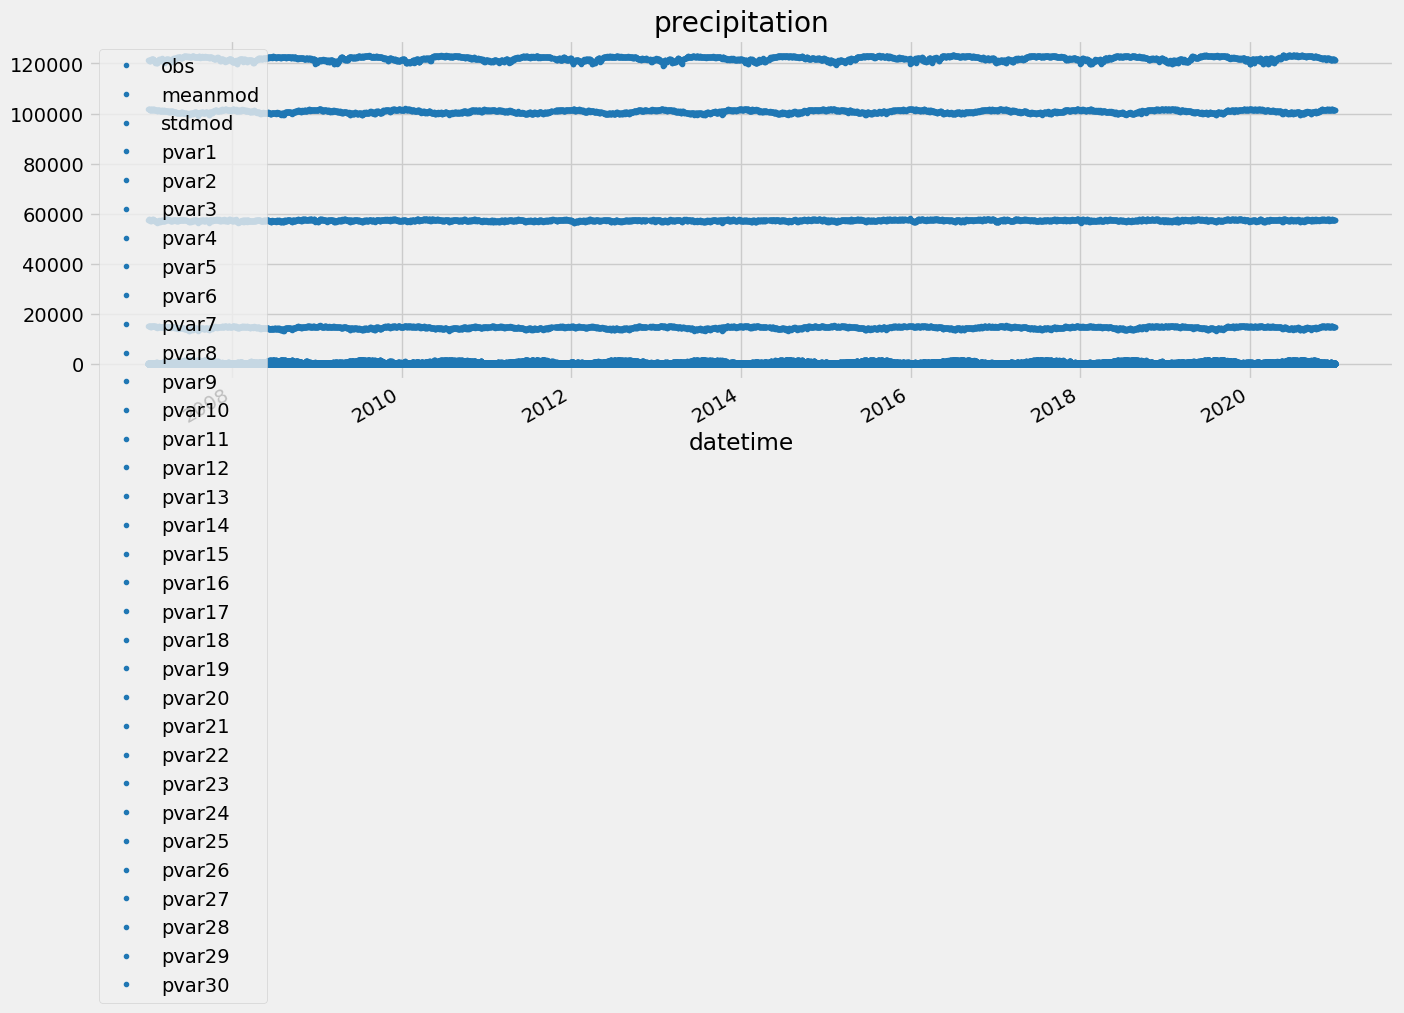

In [5]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='precipitation')
plt.show()

<AxesSubplot:ylabel='Frequency'>

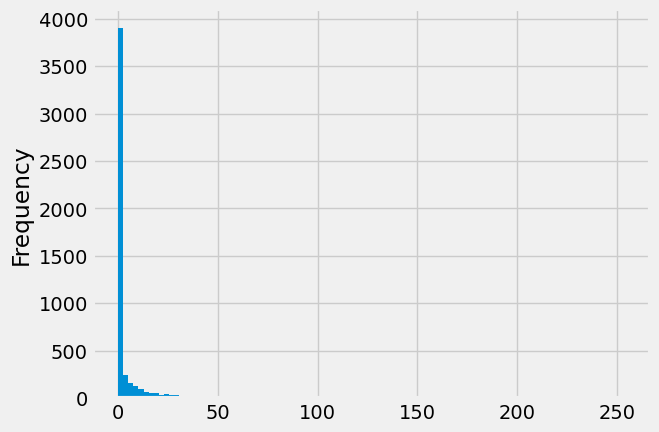

In [6]:
df['obs'].plot(kind='hist', bins=100)

In [7]:
# df.query('obs>130').plot(figsize=(15,5),style=".")

In [8]:
# df = df.query('obs<130').copy()

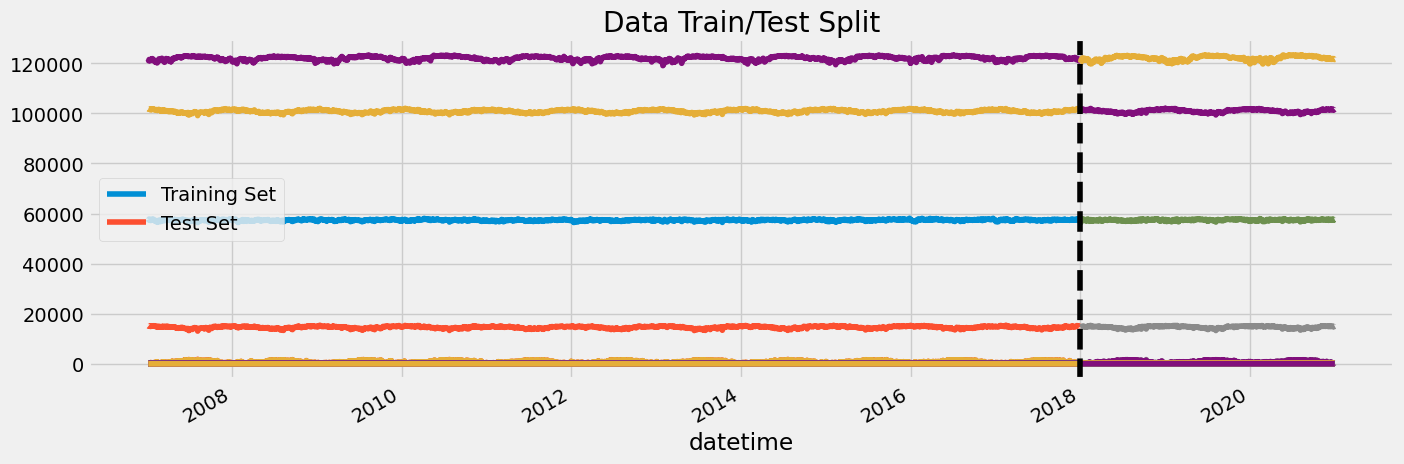

In [7]:
train = df.loc[df.index < '01-01-2018']
test = df.loc[df.index >= '01-01-2018']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2018', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [8]:
from sklearn.model_selection import TimeSeriesSplit
#test size 1 day*365 days*1 year
tss = TimeSeriesSplit(n_splits=5, test_size=1*365*1, gap=1)
df = df.sort_index()

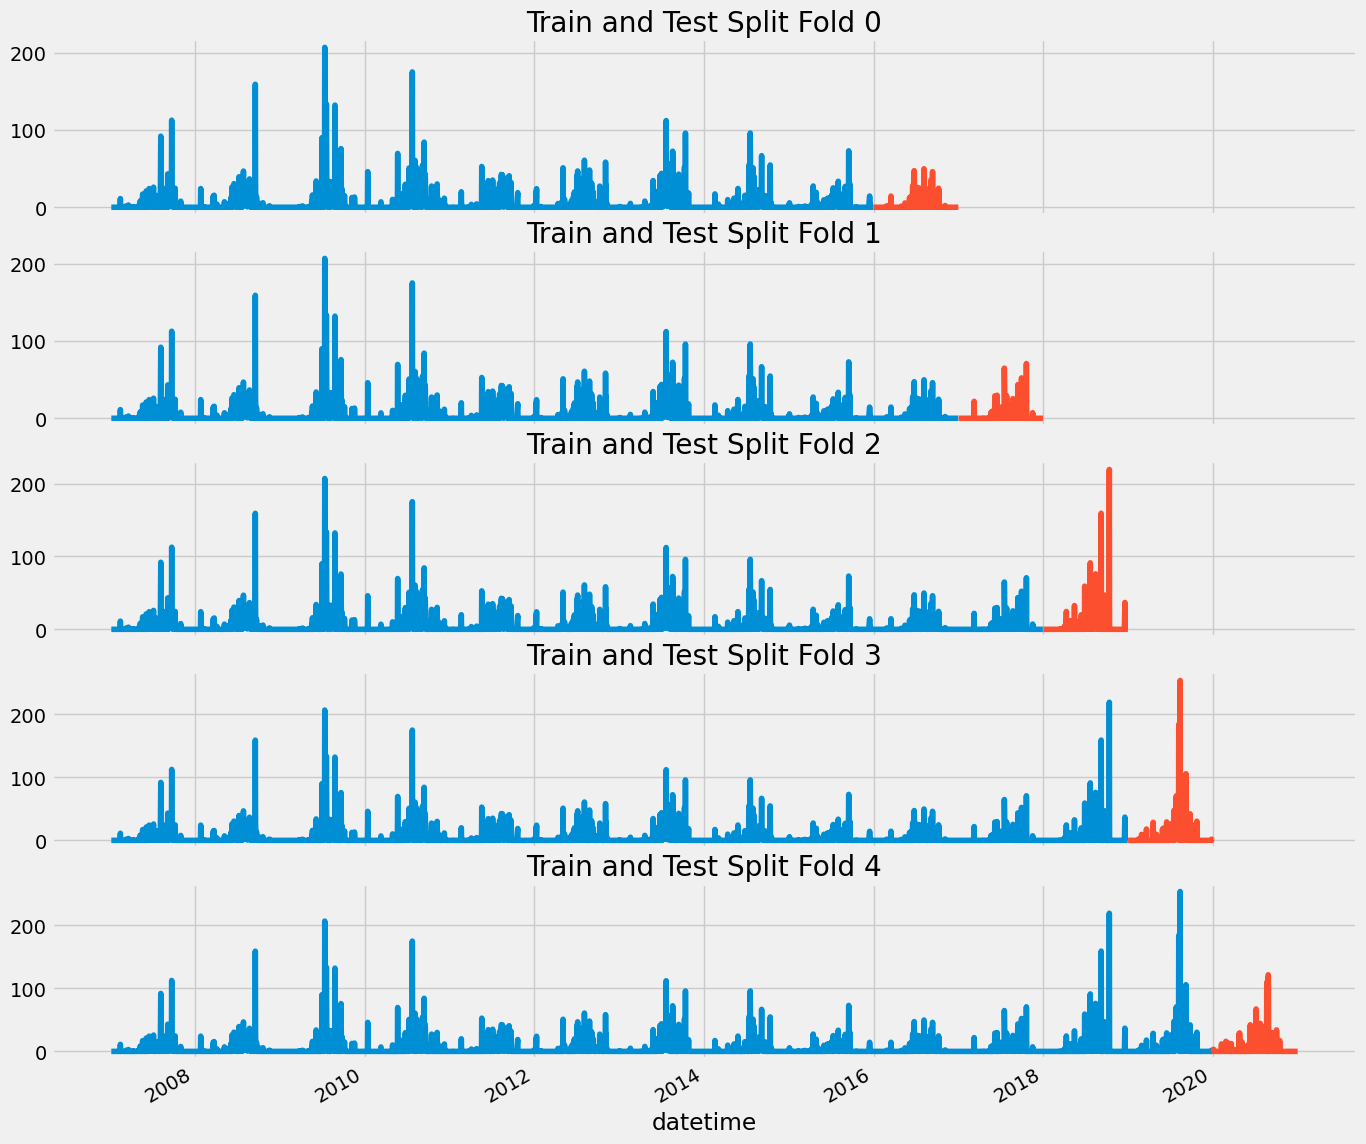

In [9]:
#time series cross validation
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['obs'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Train and Test Split Fold {fold}')
    test['obs'].plot(ax=axs[fold],
                         label='Test Set')
    #axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [10]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [11]:
df1['meanmod']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4993    0.0
4994    0.0
4995    0.0
4996    0.0
4997    0.0
Name: meanmod, Length: 4998, dtype: float64

In [12]:
df['dayofmonth']

datetime
2007-01-06     6
2007-01-07     7
2007-01-08     8
2007-01-09     9
2007-01-10    10
              ..
2020-12-27    27
2020-12-28    28
2020-12-29    29
2020-12-30    30
2020-12-31    31
Name: dayofmonth, Length: 4998, dtype: int32

In [13]:
def add_lags(df):
    target_map = df['obs'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

In [14]:
df = add_lags(df)

In [15]:
df.head()

,obs,meanmod,stdmod,pvar1,pvar2,pvar3,pvar4,pvar5,pvar6,pvar7,...,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3
datetime,,,,,,,,,,,,,,,,,,,,,
2007-01-06,0.0,0.0,0.0,291.720795,0.0,-0.782454,-0.490873,0.0,4.150000e-08,-8.050000e-06,...,5,1,1,2007,6,6,1,NaN,NaN,NaN
2007-01-07,0.0,0.0,0.0,291.902191,0.0,-0.712374,-0.414769,0.0,-2.720000e-05,-3.050000e-06,...,6,1,1,2007,7,7,1,NaN,NaN,NaN
2007-01-08,0.0,0.0,0.0,291.922394,0.0,-0.667299,0.080287,0.0,-7.300000e-06,1.560000e-05,...,0,1,1,2007,8,8,2,NaN,NaN,NaN
2007-01-09,0.0,0.0,0.0,292.204071,0.0,-0.481174,-0.055403,0.0,-4.310000e-05,1.630000e-07,...,1,1,1,2007,9,9,2,NaN,NaN,NaN
2007-01-10,0.0,0.0,0.0,292.935821,0.0,-0.396369,-0.392895,0.0,6.410000e-06,-1.220000e-05,...,2,1,1,2007,10,10,2,NaN,NaN,NaN


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error

# Assuming df is already loaded and sorted by date
df = df.sort_index()

def create_advanced_features(data):
    data['dayofyear'] = data.index.dayofyear
    data['dayofweek'] = data.index.dayofweek
    data['quarter'] = data.index.quarter
    data['month'] = data.index.month
    data['year'] = data.index.year
    data['month_year'] = data['month'] + data['year'] * 12

    data['rolling_mean_7'] = data['obs'].shift(1).rolling(window=7).mean()
    data['rolling_std_7'] = data['obs'].shift(1).rolling(window=7).std()

    for lag in [1, 2, 3, 7, 14, 21, 28]:
        data[f'lag{lag}'] = data['obs'].shift(lag)

    data.dropna(inplace=True)
    return data

df = create_advanced_features(df)

FEATURES = [
    'dayofyear', 'dayofweek', 'quarter', 'month', 'year', 'month_year',
    'rolling_mean_7', 'rolling_std_7', 'lag1', 'lag2', 'lag3', 'lag7', 'lag14', 'lag21', 'lag28'
]
for i in range(1, 31):
    FEATURES.append('pvar{}'.format(i))
TARGET = 'obs'

scaler = StandardScaler()
df_features = scaler.fit_transform(df[FEATURES])  # Scale features
df_features = df_features.reshape(-1, len(FEATURES), 1)  # Reshape for CNN

tss = TimeSeriesSplit(n_splits=5, test_size=365, gap=1)

def build_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.5),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

scores = []
for train_idx, val_idx in tss.split(df_features):
    X_train, X_test = df_features[train_idx], df_features[val_idx]
    y_train, y_test = df[TARGET].iloc[train_idx].values, df[TARGET].iloc[val_idx].values
    
    model = build_model((X_train.shape[1], 1))
    model.fit(X_train, y_train, epochs=10, verbose=0)

    y_pred = model.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

print("Best RMSE per fold:", scores)
print("Average RMSE:", np.mean(scores))


2024-05-13 16:20:45.167249: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-13 16:20:45.171632: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-13 16:20:45.220592: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 16:20:45.220653: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 16:20:45.222024: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

12/12 [==============================] - 0s 2ms/step
Best RMSE per fold: [6.127620235637186, 7.910550362165833, 16.511204912401777, 15.553115639486698, 10.842408668538436]
Average RMSE: 11.388979963645985


In [17]:
scores

[6.127620235637186,
 7.910550362165833,
 16.511204912401777,
 15.553115639486698,
 10.842408668538436]

In [18]:
print(f'mean square error across folds {np.mean(scores):0.4f}')
print(f'Fold mean square error:{scores}')

mean square error across folds 11.3890
Fold mean square error:[6.127620235637186, 7.910550362165833, 16.511204912401777, 15.553115639486698, 10.842408668538436]


In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error

# Assuming df is already loaded and sorted by date
df = df.sort_index()

def create_advanced_features(data):
    data['dayofyear'] = data.index.dayofyear
    data['dayofweek'] = data.index.dayofweek
    data['quarter'] = data.index.quarter
    data['month'] = data.index.month
    data['year'] = data.index.year
    data['month_year'] = data['month'] + data['year'] * 12

    data['rolling_mean_7'] = data['obs'].shift(1).rolling(window=7).mean()
    data['rolling_std_7'] = data['obs'].shift(1).rolling(window=7).std()

    for lag in [1, 2, 3, 7, 14, 21, 28]:
        data[f'lag{lag}'] = data['obs'].shift(lag)

    data.dropna(inplace=True)
    return data

df = create_advanced_features(df)

FEATURES = [
    'dayofyear', 'dayofweek', 'quarter', 'month', 'year', 'month_year',
    'rolling_mean_7', 'rolling_std_7', 'lag1', 'lag2', 'lag3', 'lag7', 'lag14', 'lag21', 'lag28'
]
for i in range(1, 31):
    FEATURES.append('pvar{}'.format(i))
TARGET = 'obs'

scaler = StandardScaler()
df_features = scaler.fit_transform(df[FEATURES])  # Scale features
df_features = df_features.reshape(-1, len(FEATURES), 1)  # Reshape for CNN

tss = TimeSeriesSplit(n_splits=5, test_size=365, gap=1)

def build_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.5),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

scores = []


X_all = df_features
y_all = df[TARGET]
# Re-running the model with simplified parameters
model = build_model((X_train.shape[1], 1))
model.fit(X_all, y_all, epochs=100, verbose=0)

y_pred_all = model.predict(X_all)
rmse = np.sqrt(mean_squared_error(y_all, y_pred_all))
print(f"RMSE: {rmse}")





155/155 [==============================] - 0s 2ms/step
RMSE: 4.942677294000239


In [20]:
df.index.max()

Timestamp('2020-12-31 00:00:00')

In [21]:
df


,obs,meanmod,stdmod,pvar1,pvar2,pvar3,pvar4,pvar5,pvar6,pvar7,...,lag1,lag2,lag3,month_year,rolling_mean_7,rolling_std_7,lag7,lag14,lag21,lag28
datetime,,,,,,,,,,,,,,,,,,,,,
2007-03-03,0.0,0.0,0.01,298.901001,0.000000e+00,-0.592711,-0.776590,0.0,-1.050000e-05,1.840000e-05,...,0.0,0.0,0.0,24087,0.0,0.0,0.0,0.0,0.00,0.0
2007-03-04,0.0,0.0,0.00,299.046082,0.000000e+00,0.059397,0.025911,0.0,6.460000e-07,-4.510000e-07,...,0.0,0.0,0.0,24087,0.0,0.0,0.0,0.0,0.00,0.0
2007-03-05,0.0,0.0,0.00,298.417999,0.000000e+00,-0.113047,-1.099283,0.0,-9.640000e-06,3.730000e-05,...,0.0,0.0,0.0,24087,0.0,0.0,0.0,0.0,0.00,0.0
2007-03-06,0.0,0.0,0.00,297.264984,0.000000e+00,-0.161737,-0.334008,0.0,8.410000e-06,2.020000e-05,...,0.0,0.0,0.0,24087,0.0,0.0,0.0,0.0,0.00,0.0
2007-03-07,0.0,0.0,0.00,297.972443,9.540000e-07,-0.159316,0.150100,0.0,-1.500000e-05,2.000000e-05,...,0.0,0.0,0.0,24087,0.0,0.0,0.0,0.0,11.22,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.0,0.0,0.00,292.349579,0.000000e+00,-0.134501,-0.330605,0.0,-2.790000e-05,-3.370000e-06,...,0.0,0.0,0.0,24252,0.0,0.0,0.0,0.0,0.00,0.0
2020-12-28,0.0,0.0,0.00,292.926605,0.000000e+00,-0.558952,-0.205444,0.0,9.070000e-06,3.970000e-06,...,0.0,0.0,0.0,24252,0.0,0.0,0.0,0.0,0.00,0.0
2020-12-29,0.0,0.0,0.00,294.176666,0.000000e+00,-1.051628,0.059863,0.0,7.540000e-06,-7.450000e-06,...,0.0,0.0,0.0,24252,0.0,0.0,0.0,0.0,0.00,0.0


In [22]:
# Add predicted values as a new column to the DataFrame
df['predicted_data'] = y_pred_all

In [23]:
# Replace negative predicted values with zero
df['predicted_data'] =df['predicted_data'].clip(lower=0)
df['predicted_data'] = df['predicted_data'].clip(lower=0).round(2)

In [24]:
from sklearn.metrics import r2_score

# Calculate bias
bias = np.mean(y_pred_all - y_all)

# Calculate standard deviation
std = np.std(y_pred_all - y_all)

# Calculate mean
mean = np.mean(y_pred_all)

# Calculate R-squared
r2 = r2_score(y_all, y_pred_all)

print("Bias:", bias)
print("Standard Deviation:", std)
print("Mean:", mean)
print("R-squared:", r2)


ValueError: Data must be 1-dimensional, got ndarray of shape (4942, 4942) instead

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_meanmod = np.sqrt(mean_squared_error(df['obs'], df['meanmod']))
r2_meanmod = r2_score(df['obs'], df['meanmod'])
bias_meanmod = np.mean(df['meanmod'] - df['obs'])
mean_meanmod = np.mean(df['meanmod'])

print("RMSE for meanmod:", rmse_meanmod)
print("R-squared for meanmod:", r2_meanmod)
print("Bias for meanmod:", bias_meanmod)
print("Mean for meanmod:", mean_meanmod)

mean_obs=np.mean(df['obs'])
print('obs mean',mean_obs)


RMSE for meanmod: 13.198939777516445
R-squared for meanmod: -0.004306193097375122
Bias for meanmod: 1.227235936867665
Mean for meanmod: 5.304658033184945
obs mean 4.07742209631728


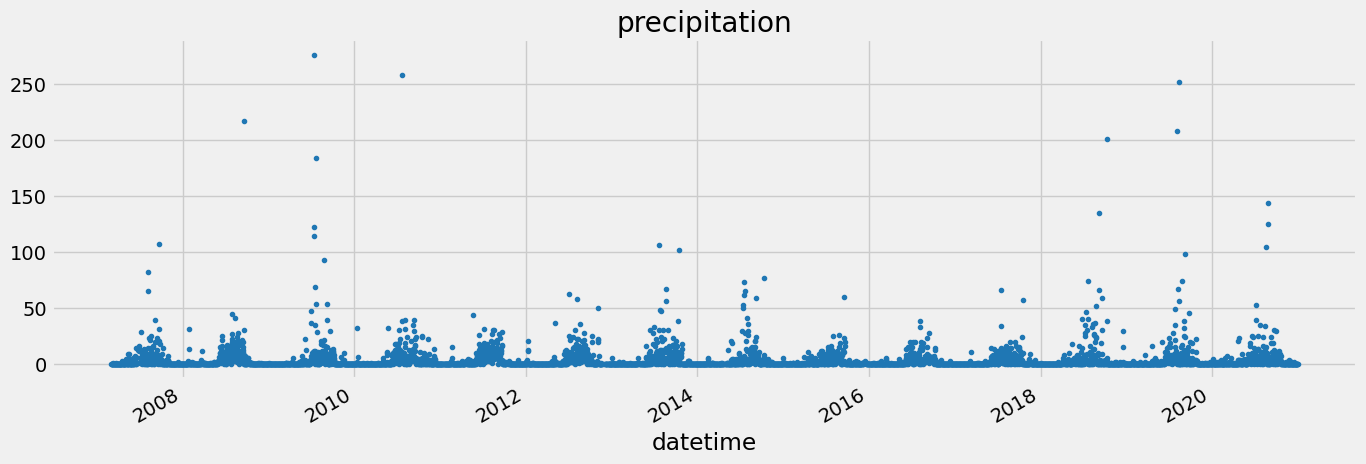

In [26]:
df['predicted_data'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='precipitation')
plt.show()

In [ ]:
df['predicted_data'].plot(kind='bar', color='blue', label='All_features_data')

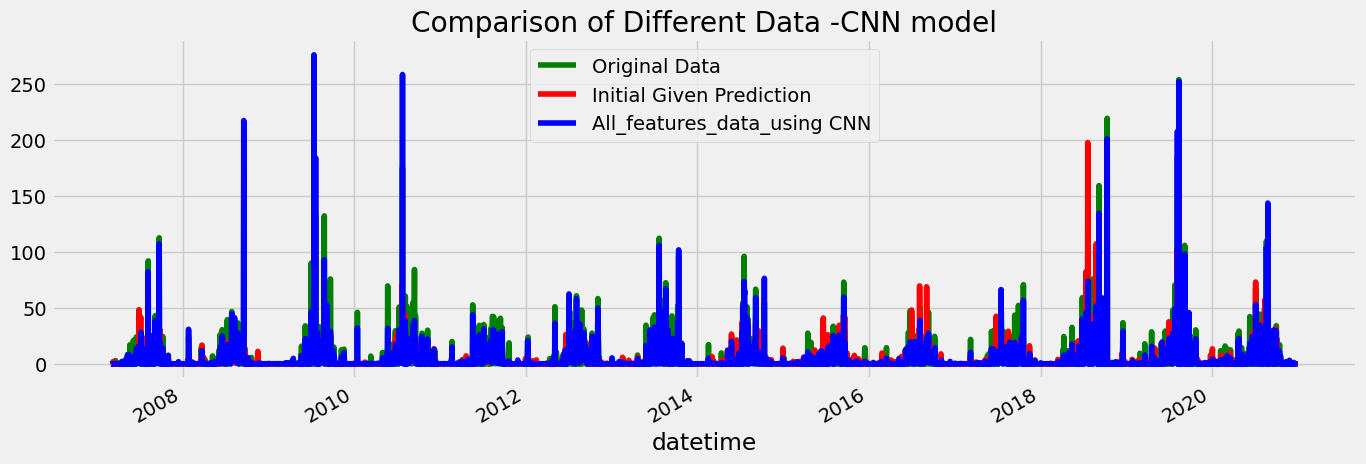

In [31]:
import matplotlib.pyplot as plt

# Plotting all the columns in a single plot
plt.figure(figsize=(15, 5))

# Plotting 'predicted_data' column

# Plotting 'obs' column
df['obs'].plot(style='-', color='green', label='Original Data')

# Plotting 'stdmod' column
df['stdmod'].plot(style='-', color='red', label='Initial Given Prediction')
df['predicted_data'].plot(style='-', color='blue', label='All_features_data_using CNN')

# Adding title and legend
plt.title('Comparison of Different Data -CNN model')
plt.legend()

# Display the plot
plt.show()


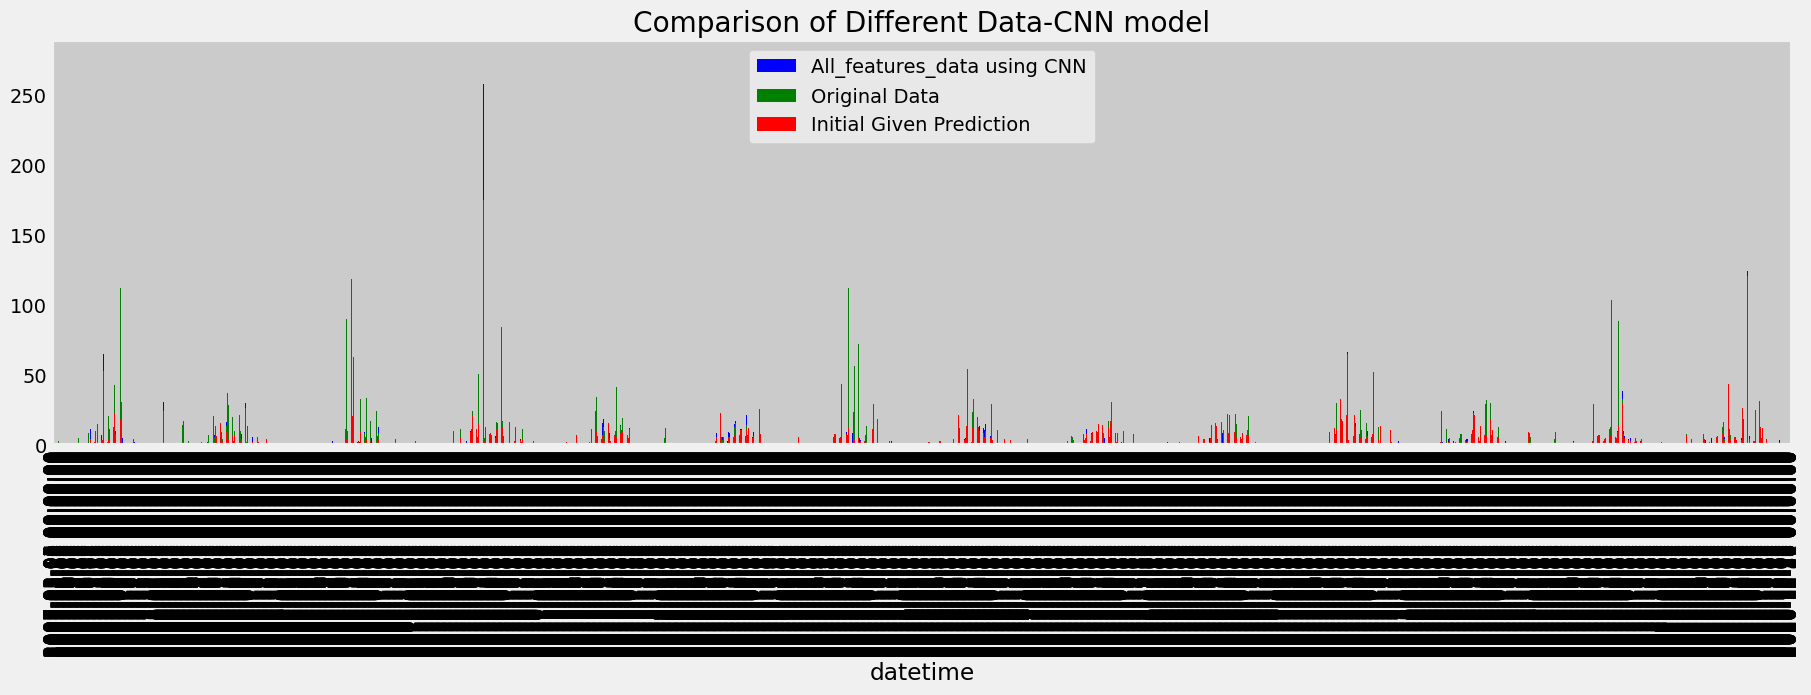

In [29]:
import matplotlib.pyplot as plt

# Plotting all the columns in a single plot
plt.figure(figsize=(20, 5))

# Plotting 'predicted_data' column
df['predicted_data'].plot(kind='bar', color='blue', label='All_features_data using CNN')

# Plotting 'obs' column
df['obs'].plot(kind='bar', color='green', label='Original Data')

# Plotting 'stdmod' column
df['stdmod'].plot(kind='bar', color='red', label='Initial Given Prediction')

# Adding title and legend
plt.title('Comparison of Different Data-CNN model')
plt.legend()

# Display the plot
plt.show()
